In [1]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib as mpl
import scipy.stats as stats
import sys
import os
from importlib import reload
from tqdm import tqdm
import pickle5 as pickle


#################### Figure settings
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,mark_inset)

area=4.0;linethicknes=1.0;

font = {'family' : 'normal','weight' : 'normal','size'   : 7, 'family':'serif','serif':['Arial']}
mpl.rc('font', **font)
mpl.rcParams['lines.linewidth'] =linethicknes
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['pdf.fonttype'] = 42


#####################  Import code
sys.path.insert(0, './../../../DataAndScripts/structured_scripts/')

import functions_optimal as funopt
import functions as fun
import data_analysis as da
import sims_utils as su
import validate_utils as vu
import load_utils as lu
import plot_functions as pl
import ricciardi_class as ric
ri = ric.Ricciardi()
ri.set_up_nonlinearity()
import network as network
reload(vu)
reload(pl)


/Users/agos/Dropbox/ColumbiaProjects/Code_Reshuffling_Github/1-MainTextFigures/Figure_7_agos/generate_simulations
/Users/agos/Dropbox/ColumbiaProjects/Code_Reshuffling_Github/1-MainTextFigures/Figure_7_agos/generate_simulations


<module 'plot_functions' from './../../../DataAndScripts/structured_scripts/plot_functions.py'>

# Load data class

In [3]:
data=da.Data_MonkeyMouse('both','./../../../DataAndScripts/experimental_data/')


# Get best fit parameters

In [4]:
with open('./best_fit_params/Model_Fit_Separately_StructModel-Best.pkl', 'rb') as handle:
    comb_fit = pickle.load(handle)
    
fit_preds = {}
fit_params = {}
fit_rX = {}

for anim_idx in range(2):
    fit_preds[anim_idx] = comb_fit['predictions_of_r_sim_'+data.this_animals[anim_idx]]
    fit_params[anim_idx] = np.concatenate(([0,500,0.09,30,1e-3,200],
                                           comb_fit['best_params_'+data.this_animals[anim_idx]]))
    fit_rX[anim_idx] = comb_fit['best_rXs_'+data.this_animals[anim_idx]]


# Plot best fit

Done


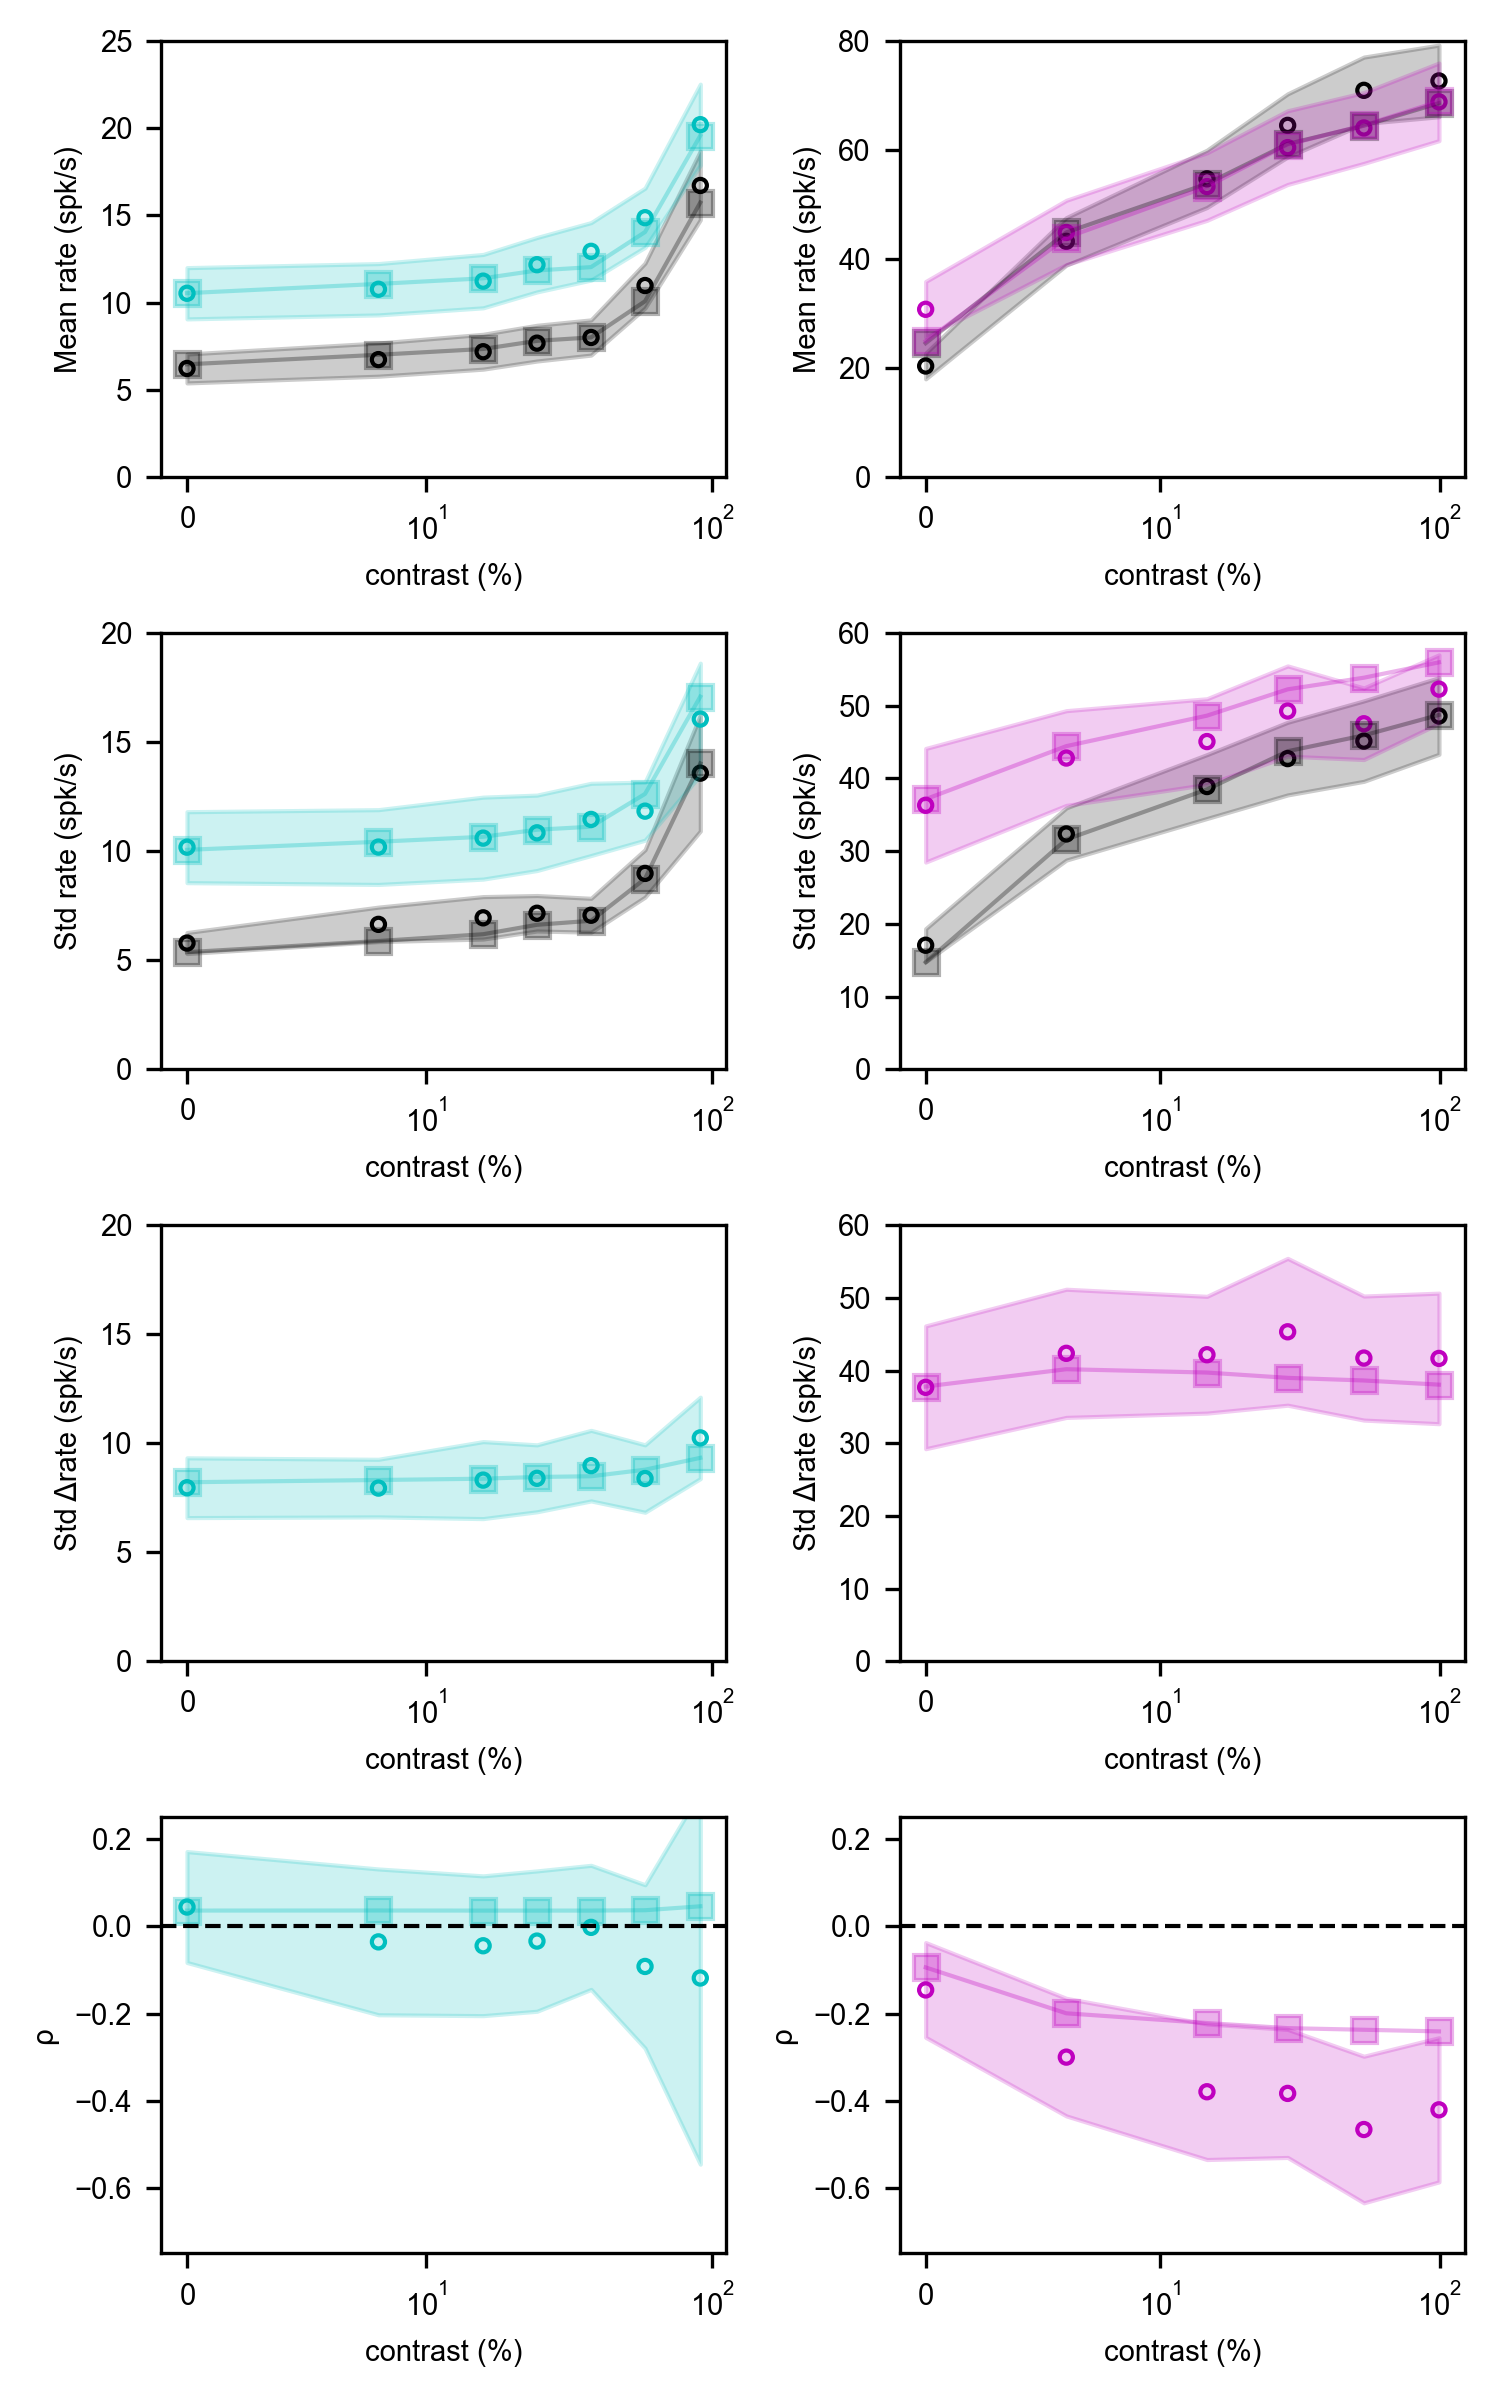

In [6]:

pl.plot_best_preds_from_validate_param({0:[[np.array([fit_preds[0]])]+[np.zeros((0,6,7))]*6][0],
                                        1:[[np.array([fit_preds[1]])]+[np.zeros((0,6,6))]*5][0]},
                                       with_contrast=True)

# Set up best fit parameters

In [7]:
fit_params

{0: array([0.00e+00, 5.00e+02, 9.00e-02, 3.00e+01, 1.00e-03, 2.00e+02,
        1.80e+00, 8.09e+00, 2.58e+00, 3.44e-01, 3.39e-03, 2.56e-01,
        1.36e-01, 2.18e+01, 4.84e+01, 7.10e-01, 9.29e-05, 2.31e+01,
        5.53e+00]),
 1: array([0.00e+00, 5.00e+02, 9.00e-02, 3.00e+01, 1.00e-03, 2.00e+02,
        1.68e+00, 3.89e+00, 2.40e+00, 1.60e+00, 3.98e-03, 9.48e-01,
        8.40e-01, 3.17e+01, 2.08e+01, 2.53e+00, 5.26e-04, 2.01e+01,
        9.01e+00])}

In [16]:
seeds=[1,3,5,7]
max_min=15


for animal, animal_idx in zip(data.this_animals,range(2)):

    params_dict={}
    params_dict['Stim_Size'] = 0.5
    params_dict['seed_con']  = int(fit_params[animal_idx][vu.res_param_idxs_fixed['seed_con']])
    params_dict['KX']        = int(fit_params[animal_idx][vu.res_param_idxs_fixed['KX']])
    params_dict['pmax']      = fit_params[animal_idx][vu.res_param_idxs_fixed['pmax']]
    params_dict['SoriE']     = fit_params[animal_idx][vu.res_param_idxs_fixed['SoriE']]
    params_dict['Lam']       = fit_params[animal_idx][vu.res_param_idxs_fixed['Lam']]
    params_dict['J']         = fit_params[animal_idx][vu.res_param_idxs['J']]
    params_dict['GI']        = fit_params[animal_idx][vu.res_param_idxs['GI']]
    params_dict['gE']        = fit_params[animal_idx][vu.res_param_idxs['gE']]
    params_dict['gI']        = fit_params[animal_idx][vu.res_param_idxs['gI']]
    params_dict['beta']      = fit_params[animal_idx][vu.res_param_idxs['beta']]
    params_dict['CV_K']      = fit_params[animal_idx][vu.res_param_idxs['CV_K']]
    params_dict['SlE']       = fit_params[animal_idx][vu.res_param_idxs['SlE']]
    params_dict['SlI']       = fit_params[animal_idx][vu.res_param_idxs['SlI']]
    params_dict['SoriI']     = fit_params[animal_idx][vu.res_param_idxs['SoriI']]
    params_dict['Stun']      = fit_params[animal_idx][vu.res_param_idxs['Stun']]
    params_dict['CV_Lam']    = fit_params[animal_idx][vu.res_param_idxs['CV_Lam']]
    params_dict['L']         = fit_params[animal_idx][vu.res_param_idxs['L']]
    params_dict['Nl']=25
    params_dict['NE']=8
    params_dict['n']=2
    params_dict['gamma']=0.25
    params_dict['dl']=1
    params_dict['ori_type']='columnar'
    params_dict['vanilla_or_not']=False

    
    Tmax_over_tau_E =fit_params[animal_idx][vu.res_param_idxs_fixed['Tmax_over_tau_E']]
    T = np.arange(0,1.5*Tmax_over_tau_E*ri.tau_E,ri.tau_I/3);
    mask_time=T>(0.5*Tmax_over_tau_E*ri.tau_E)

    
    net_dict={}
    net_dict['seed_con']=params_dict['seed_con']
    net_dict['n']=params_dict['n']
    net_dict['Nl']=params_dict['Nl']
    net_dict['NE']=params_dict['NE']
    net_dict['gamma']=params_dict['gamma']
    net_dict['dl']=params_dict['dl']
    net_dict['Sl']=np.array([[ params_dict['SlE'],params_dict['SlI']],[params_dict['SlE'],params_dict['SlI']]])
    net_dict['Sori']=np.array([[params_dict['SoriE'],params_dict['SoriI']],[params_dict['SoriE'],params_dict['SoriI']]])
    net_dict['Stun']=params_dict['Stun']
    net_dict['ori_type']=params_dict['ori_type']

    
    
    net = network.network(**net_dict)
    net.GI = params_dict['GI']


    
#     print("Parameters used seed= {:d} // GI= {:.2f} // gE= {:.2f} // gI= {:.2f} // beta= {:.2f} // KX= {:d} // pmax= {:.2f}" \
#     .format(int(seed_con),GI,gE,gI,beta,int(KX),pmax))
#     print("CV_K= {:.4f} // SlE= {:.3f} // SlI= {:.3f} // SoriE= {:.2f} // SoriI= {:.2f} // Stun= {:.2f}"\
#     .format(CV_K,SlE,SlI,SoriE,SoriI,Stun))
#     print("Lam= {:.3f} // CV_Lam= {:.2f} // J= {:.6f} // rX= {:.2f} // L= {:.2f} // Tmax_over_tau_E= {:d}"\
#     .format(Lam,CV_Lam,J,rX,L,int(Tmax_over_tau_E)))
#     print('')

    
    sim_dict={}
    sim_dict['rX_vec']=fit_rX[animal_idx]
    sim_dict['ri']=ri
    sim_dict['T']=T
    sim_dict['mask_time']=mask_time
    sim_dict['RF']='in'
    sim_dict['tuned']='yes'
    sim_dict['map_seed']=params_dict['seed_con']
    sim_dict['seeds']=seeds
    sim_dict['max_min']=max_min

    _,s_preds_tuned,s_preds_untuned,s_rates,_,_ =\
    lu.sim_const_map(params_dict,**sim_dict)


    with open('RATES_structured_'+animal+'.pkl', 'wb') as handle:
        pickle.dump(s_rates, handle, protocol=pickle.HIGHEST_PROTOCOL)


Doing contrast 1 of 7
      Integration stopped after 0.7s of simulation time
      Integration stopped after 0.55s of simulation time
      Integration stopped after 4.76s of simulation time
      Integration stopped after 0.79s of simulation time
      Integration stopped after 0.24s of simulation time
      Integration stopped after 0.83s of simulation time
      Integration stopped after 0.53s of simulation time
Doing contrast 2 of 7
      Integration stopped after 0.46s of simulation time
      Integration stopped after 1.18s of simulation time
      Integration stopped after 0.34s of simulation time
      Integration stopped after 1.06s of simulation time
      Integration stopped after 0.46s of simulation time
      Integration stopped after 3.31s of simulation time
      Integration stopped after 0.41s of simulation time
      Integration stopped after 5.15s of simulation time
Doing contrast 3 of 7
      Integration stopped after 0.41s of simulation time
      Integration stopp

# Obsrve tuned neurons 

In [ ]:
ori_idx=net.get_oriented_neurons(delta_ori=22.5)
ori_idx=np.hstack([i*6250+ori_idx for i in range(len(seeds))])

rf_idx=net.get_centered_neurons(stim_size=0.6)
rf_idx=np.hstack([i*6250+rf_idx for i in range(len(seeds))])

sing_tune_idx=np.intersect1d(net.get_oriented_neurons(delta_ori=22.5),
                             net.get_centered_neurons(stim_size=0.6))
sing_tuneE_idx=np.intersect1d(net.allE,sing_tune_idx)
sing_tuneI_idx=np.intersect1d(net.allI,sing_tune_idx)

tune_idx=np.intersect1d(ori_idx,rf_idx)

E_idx=np.hstack([i*6250+net.allE for i in range(len(seeds))])
I_idx=np.hstack([i*6250+net.allI for i in range(len(seeds))])

tuneE_idx=np.intersect1d(E_idx,tune_idx)
tuneI_idx=np.intersect1d(I_idx,tune_idx)

untuneE_idx=np.setdiff1d(E_idx,tune_idx)
untuneI_idx=np.setdiff1d(I_idx,tune_idx)